In [73]:
from cleaning import database_cleaner
from model import get_data, MyModel

from time import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.cm as cm

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import scale

np.random.seed(42)

# Code taken from 
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

In [31]:
vectorizer, data = get_data('../data/pge_database.json')

0 faculties have missing papers in ../data/pge_database.json
Running nlp-pipeline on faculties with non-missing papers...


# Evaluating Cluster Performance

In [ ]:
# http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

# If the ground truth labels are not known, evaluation must be performed using the model itself. 
# The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, 
# where a higher Silhouette Coefficient score relates to a model with better defined clusters.

from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

In [72]:
n_samples, n_features = data.shape

sample_size = 300

print("n_samples %d, \t n_features %d"
      % (n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    ss = metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)
    print(f"{name}, {(time() - t0):.3f}, {estimator.inertia_:.3f},{ss:.3f}") 

num_clusters = range(3, 13)

for n_cluster in num_clusters:
    bench_k_means(KMeans(init='k-means++', n_clusters=n_cluster, n_init=10),
                  name="k-means++ " + str(n_cluster) + " clusters", data=data)

    bench_k_means(KMeans(init='random', n_clusters=n_cluster, n_init=10),
                  name="random " + str(n_cluster) + " clusters", data=data)

    # in this case the seeding of the centers is deterministic, hence we run the
    # kmeans algorithm only once with n_init=1
    svd = TruncatedSVD(n_components=n_cluster, n_iter=7, random_state=42).fit(data)
    bench_k_means(KMeans(init=svd.components_, n_clusters=n_cluster, n_init=1),
                  name="SVD-based " + str(n_cluster) + " clusters",
                  data=data)
print(82 * '_')

n_samples 75, 	 n_features 9209
__________________________________________________________________________________
init		time	inertia	silhouette
k-means++ 3 clusters, 2.084, 56.526,0.027
random 3 clusters, 1.809, 57.087,0.027
SVD-based 3 clusters, 0.159, 57.858,-0.002
k-means++ 4 clusters, 1.848, 54.842,0.030
random 4 clusters, 1.710, 55.562,0.027
SVD-based 4 clusters, 0.161, 56.113,0.022
k-means++ 5 clusters, 2.018, 53.330,0.030
random 5 clusters, 1.504, 54.085,0.026
SVD-based 5 clusters, 0.162, 54.865,-0.006
k-means++ 6 clusters, 2.026, 52.537,0.037
random 6 clusters, 1.828, 52.491,0.034
SVD-based 6 clusters, 0.163, 53.820,-0.016
k-means++ 7 clusters, 1.914, 50.378,0.035
random 7 clusters, 2.112, 50.604,0.035
SVD-based 7 clusters, 0.226, 51.595,0.033
k-means++ 8 clusters, 1.927, 49.436,0.035
random 8 clusters, 1.761, 49.983,0.032
SVD-based 8 clusters, 0.212, 50.549,0.034
k-means++ 9 clusters, 1.985, 47.614,0.040
random 9 clusters, 1.750, 48.983,0.032
SVD-based 9 clusters, 0.233, 49.5

# Elbow Method

Text(0,0.5,'Within-Cluster Sum of Squares/Inertia')

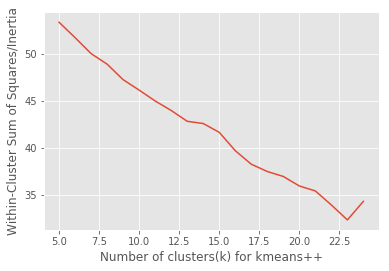

In [88]:
range_n_clusters = range(5, 25)
sses = [KMeans(init='k-means++', n_clusters=n_clusters, n_init=10).fit(data).inertia_ for n_clusters in range_n_clusters]
plt.plot(range_n_clusters,sses)
plt.xlabel('Number of clusters(k) for kmeans++')
plt.ylabel('Within-Cluster Sum of Squares/Inertia')

# Silhouette Analysis

For n_clusters = 5 The average silhouette_score is : 0.04057083387433415


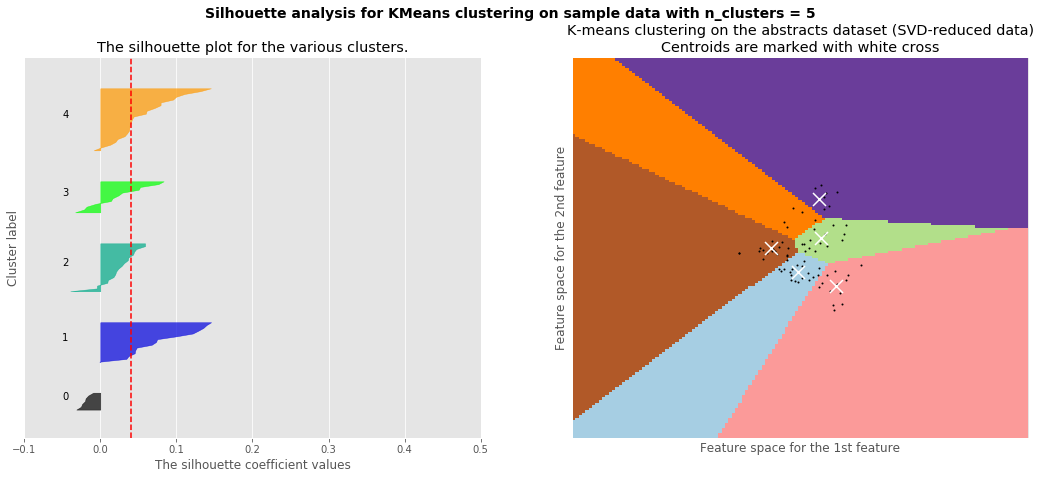

For n_clusters = 6 The average silhouette_score is : 0.04184866791285394


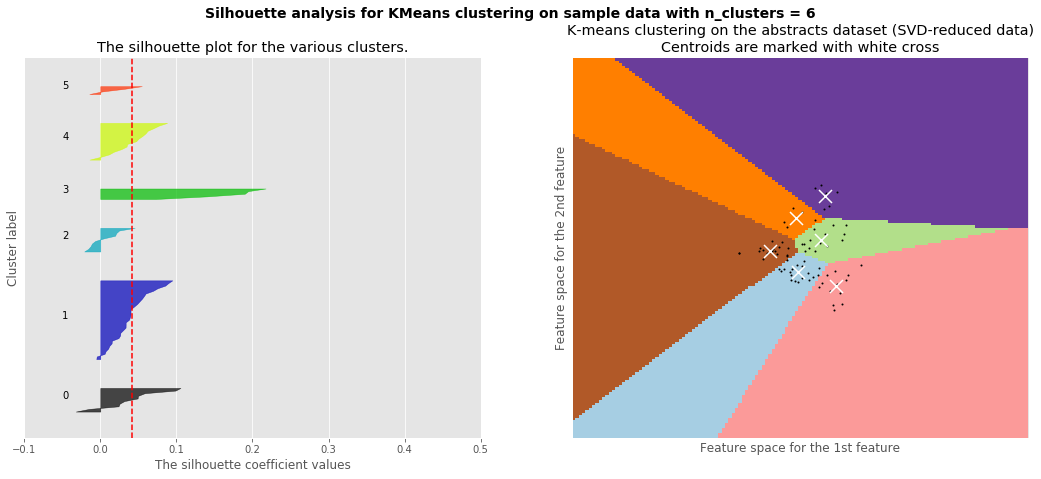

For n_clusters = 7 The average silhouette_score is : 0.04241318693413073


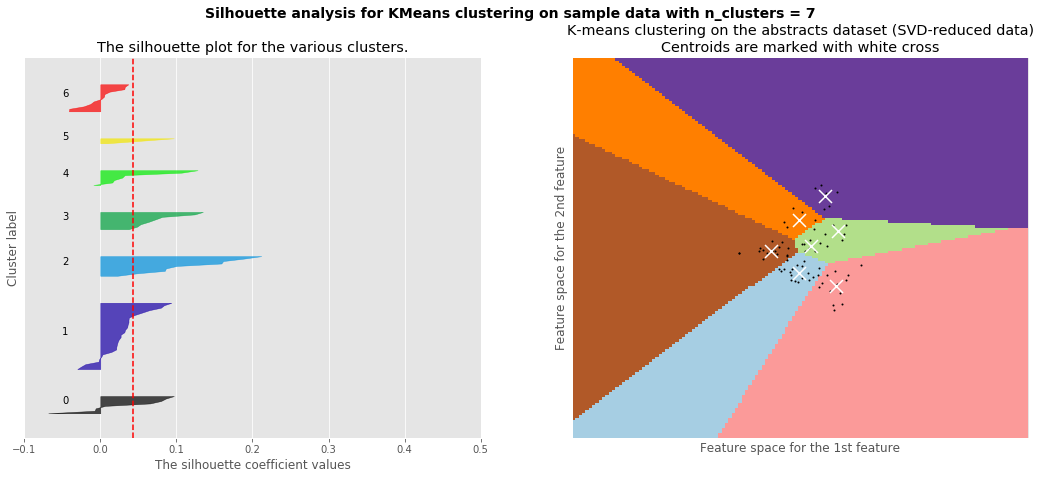

For n_clusters = 8 The average silhouette_score is : 0.03613428596931973


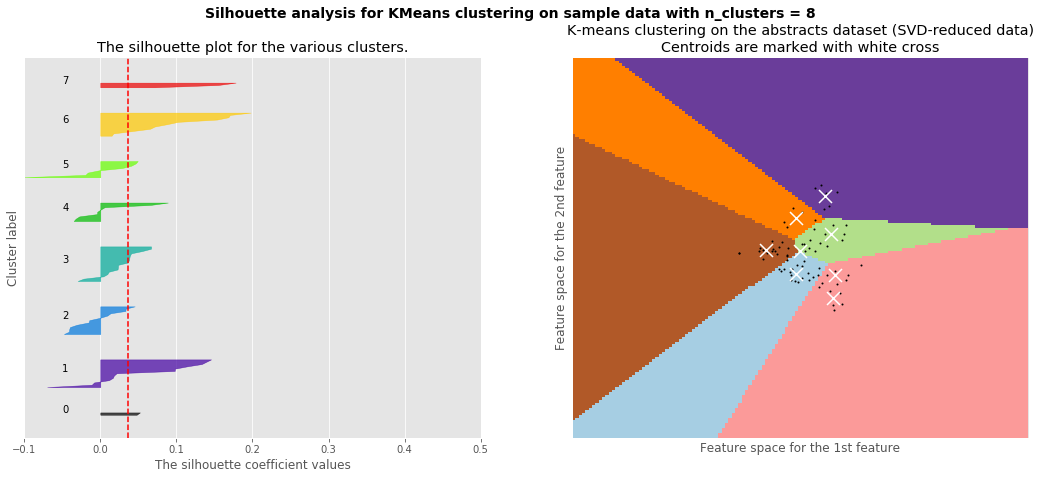

For n_clusters = 9 The average silhouette_score is : 0.030270990615307577


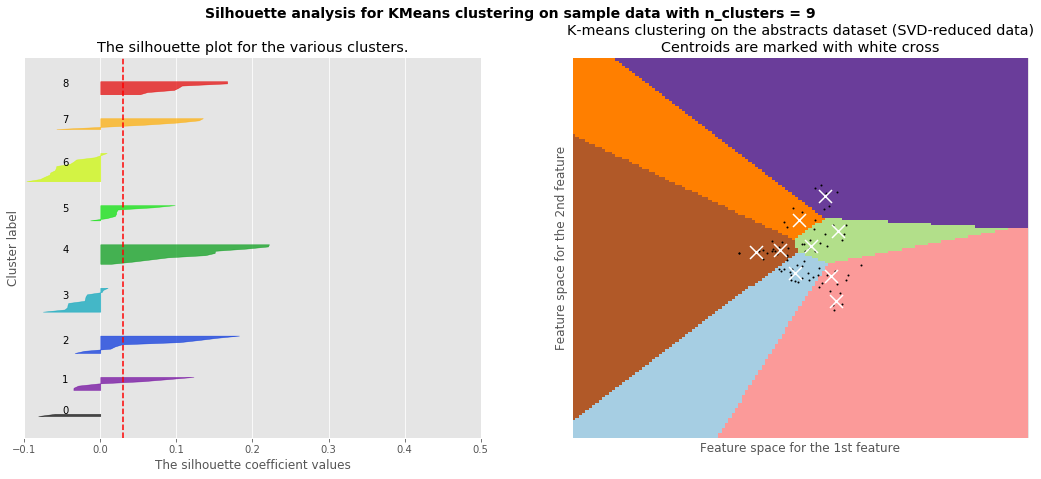

For n_clusters = 10 The average silhouette_score is : 0.045363643805389715


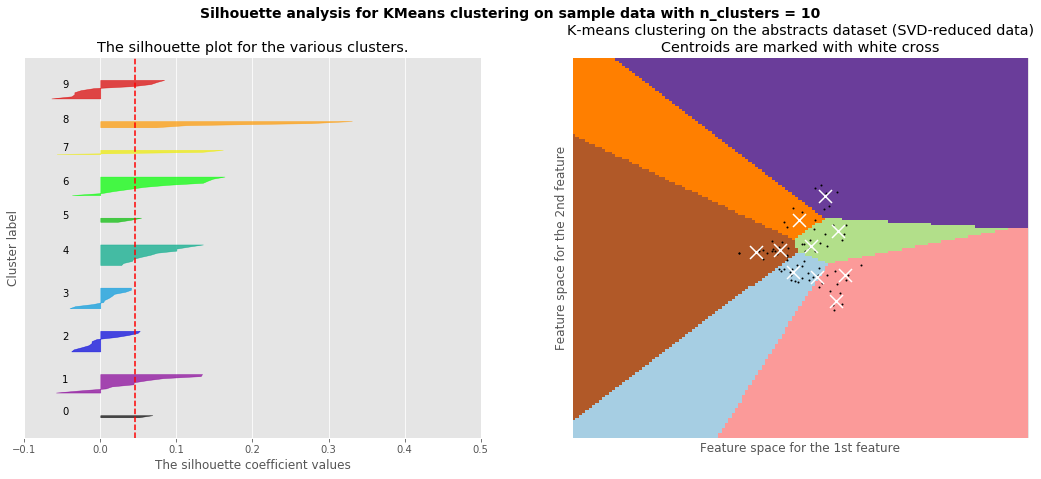

For n_clusters = 11 The average silhouette_score is : 0.047165096778731375


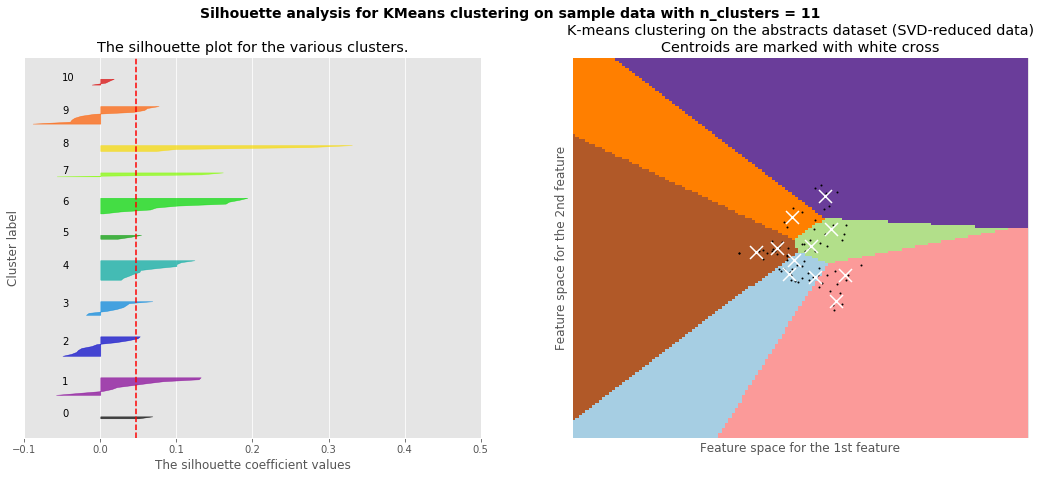

For n_clusters = 12 The average silhouette_score is : 0.053219396581314055


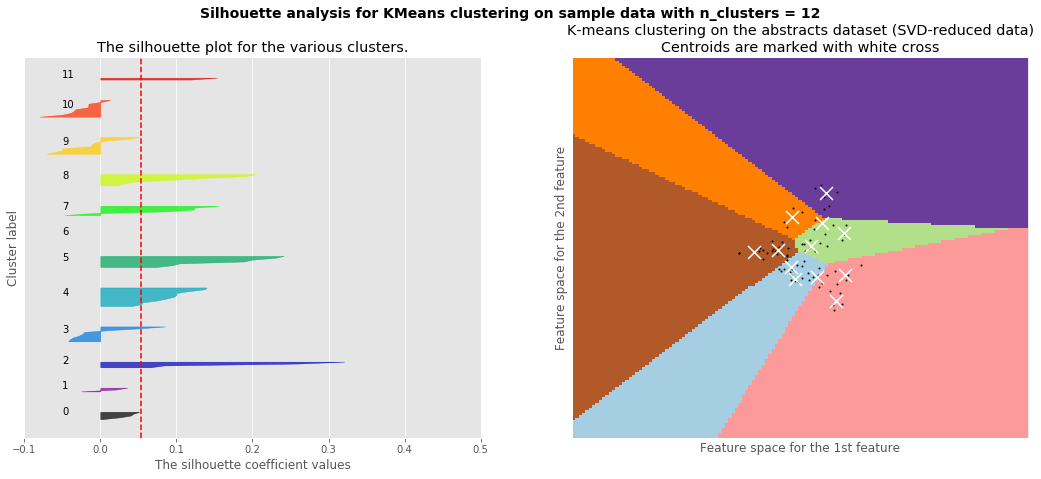

For n_clusters = 13 The average silhouette_score is : 0.0470724042729114


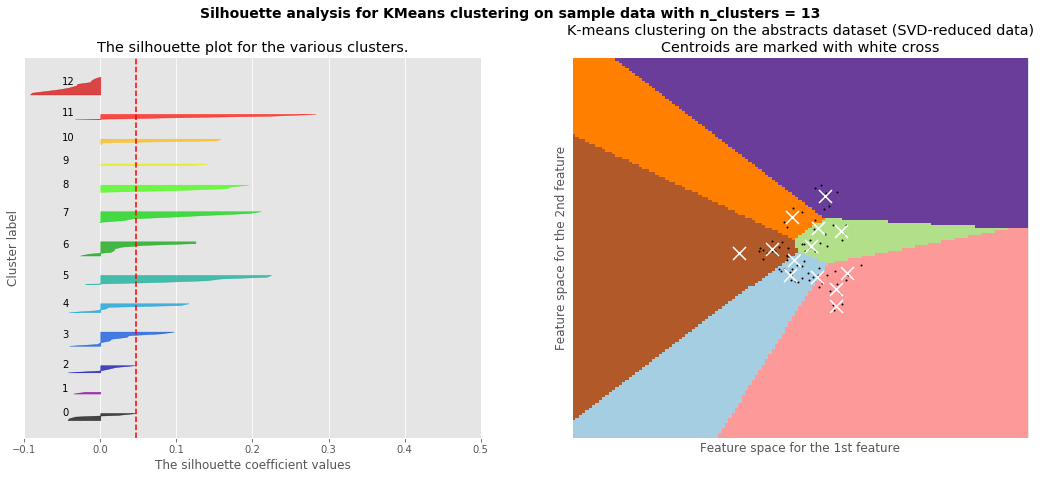

For n_clusters = 14 The average silhouette_score is : 0.024771703228187277


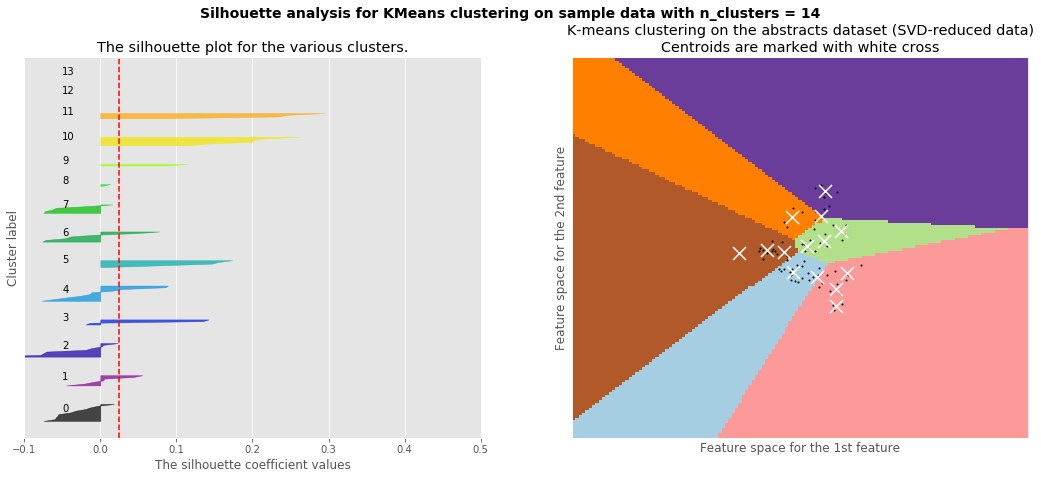

For n_clusters = 15 The average silhouette_score is : 0.05594101265351066


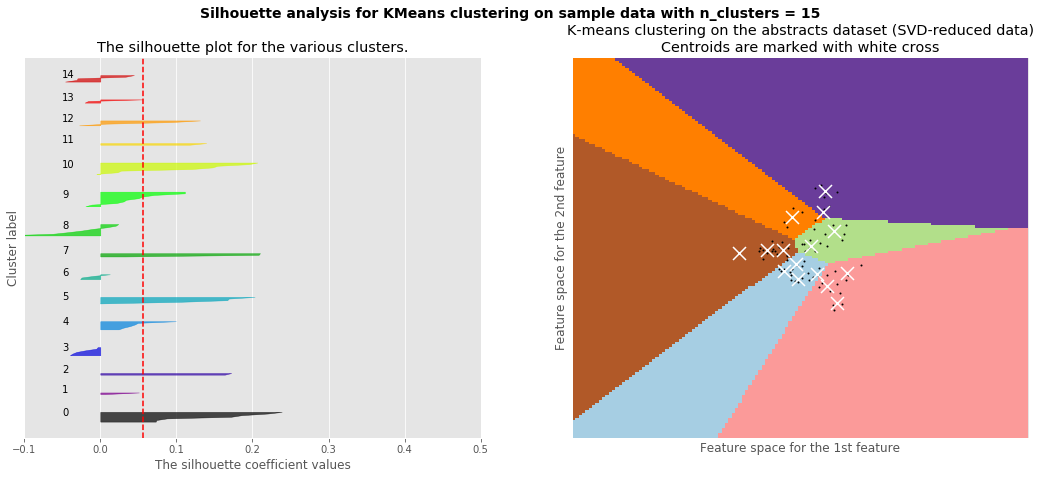

For n_clusters = 16 The average silhouette_score is : 0.04615695210588691


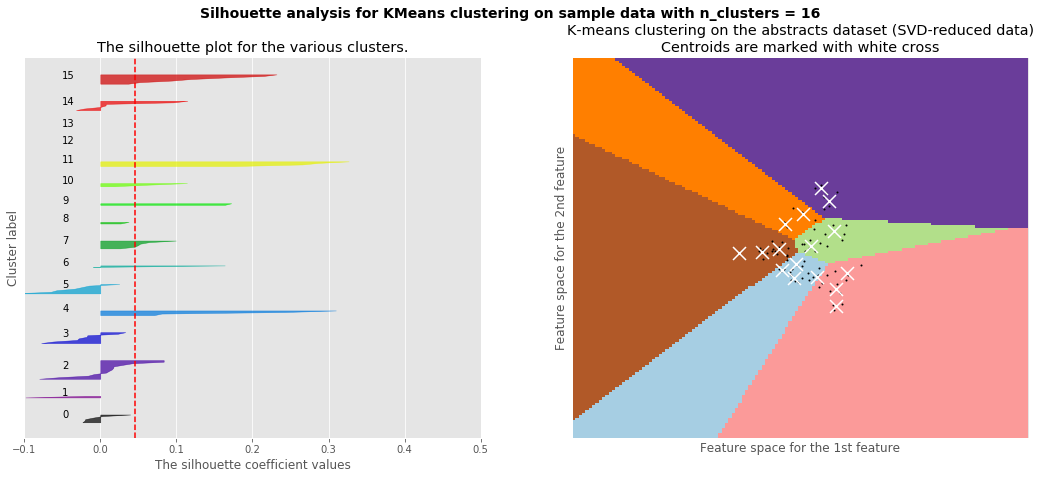

For n_clusters = 17 The average silhouette_score is : 0.03690588589686312


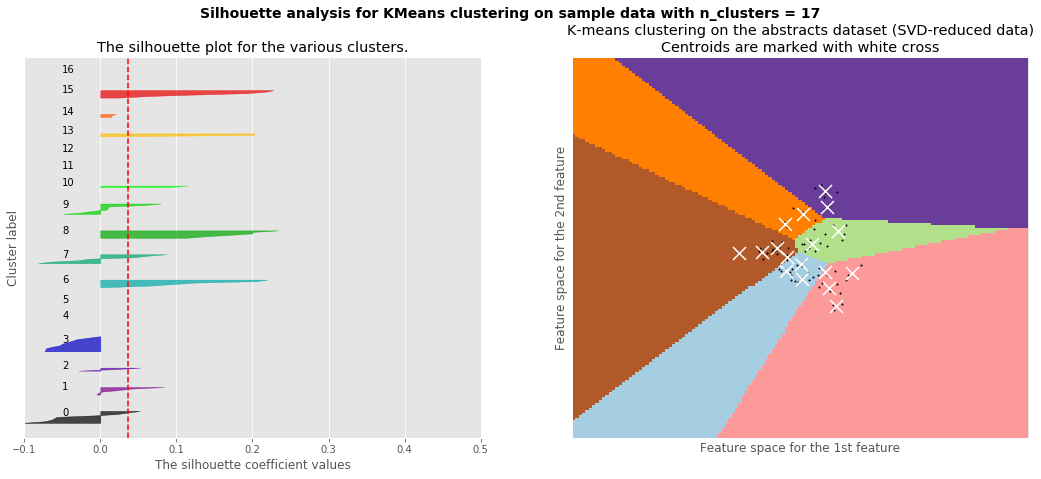

For n_clusters = 18 The average silhouette_score is : 0.05177270487753066


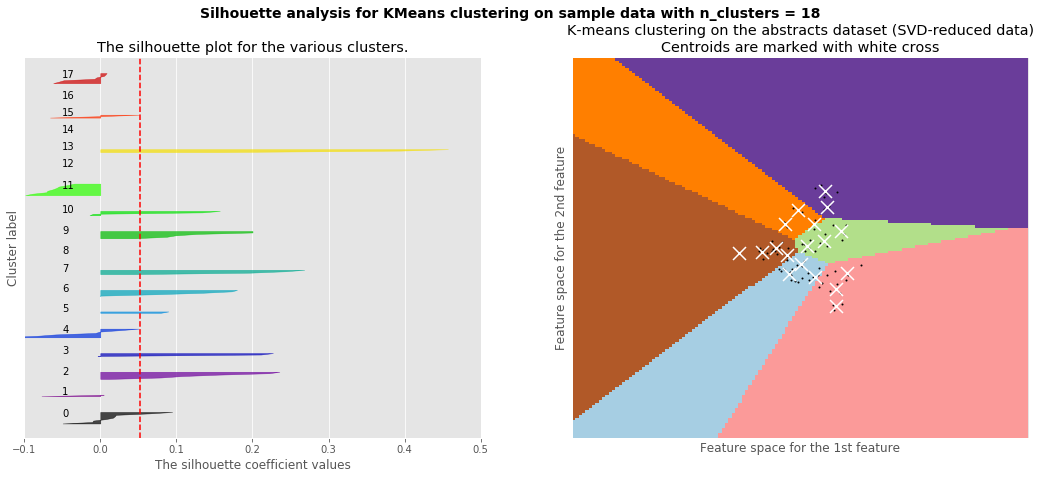

For n_clusters = 19 The average silhouette_score is : 0.0575969268794954


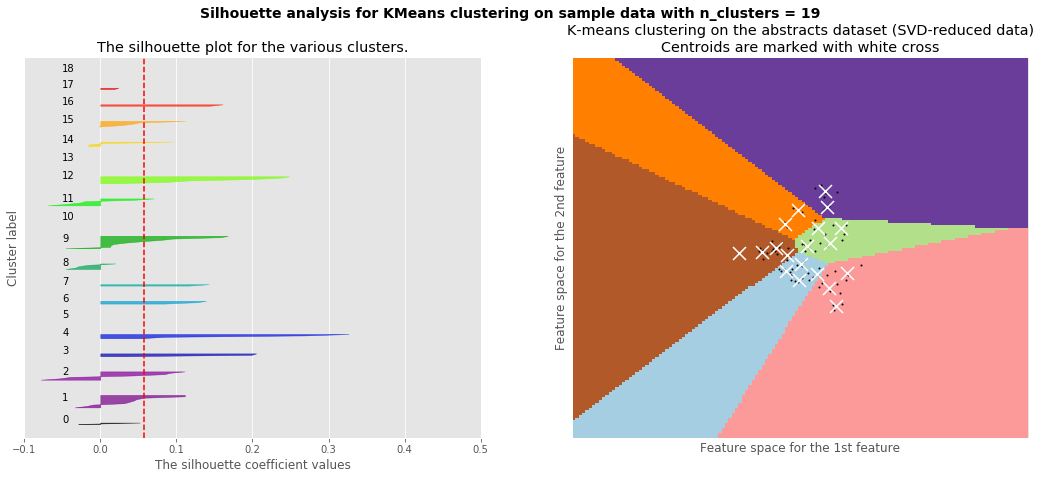

For n_clusters = 20 The average silhouette_score is : 0.03366272001822927


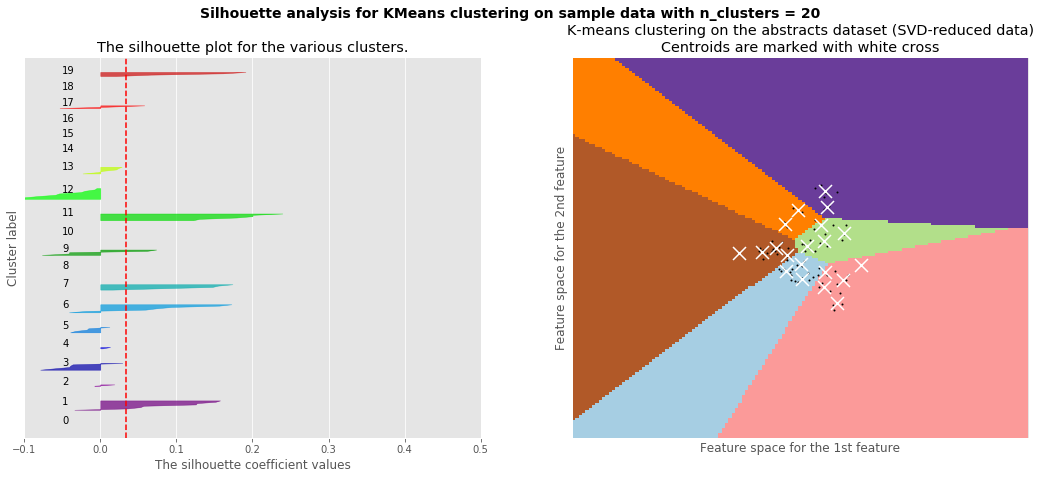

For n_clusters = 21 The average silhouette_score is : 0.03225661042858947


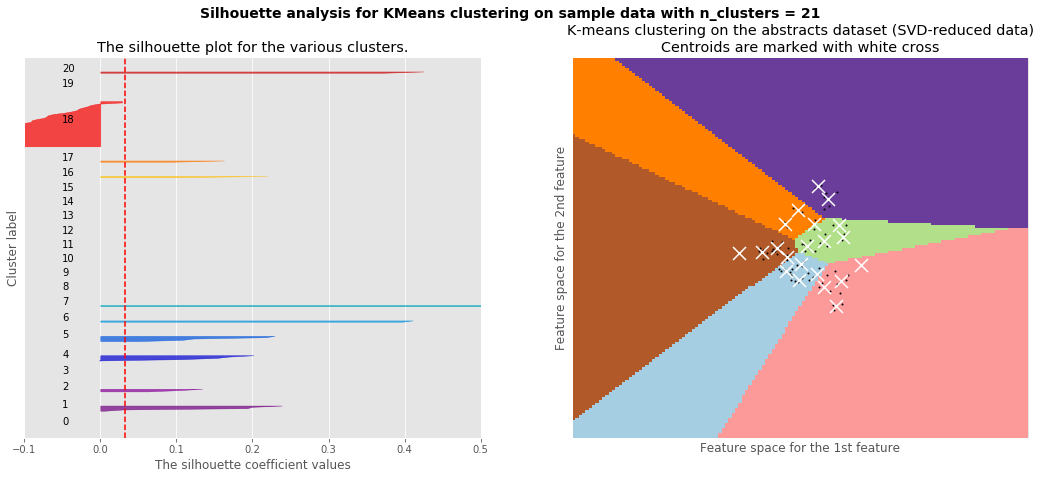

For n_clusters = 22 The average silhouette_score is : 0.030440087827201937


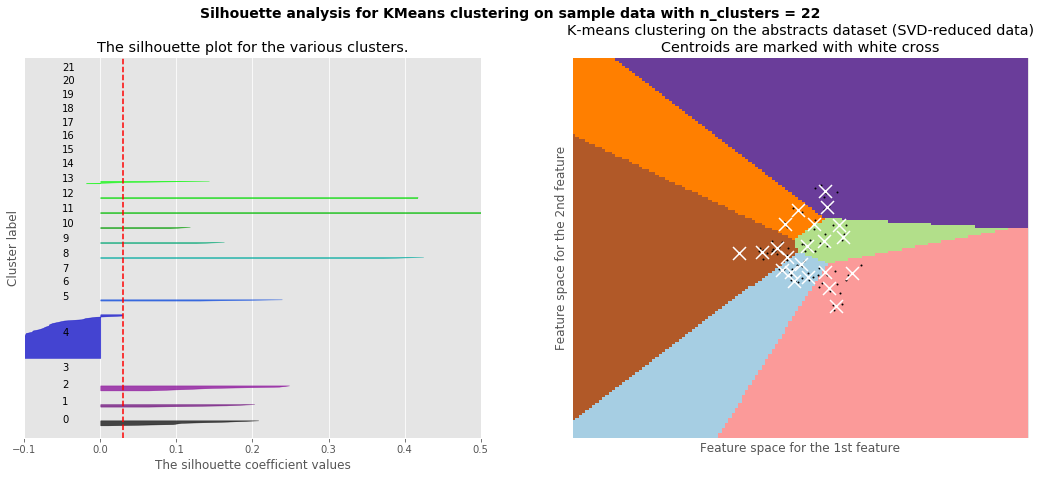

For n_clusters = 23 The average silhouette_score is : 0.034610930127764374


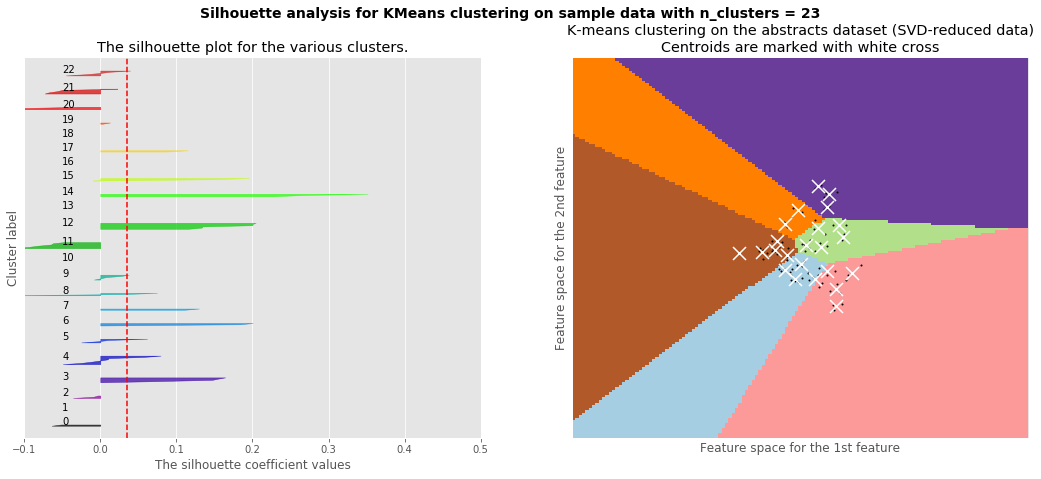

For n_clusters = 24 The average silhouette_score is : 0.0452975324910963


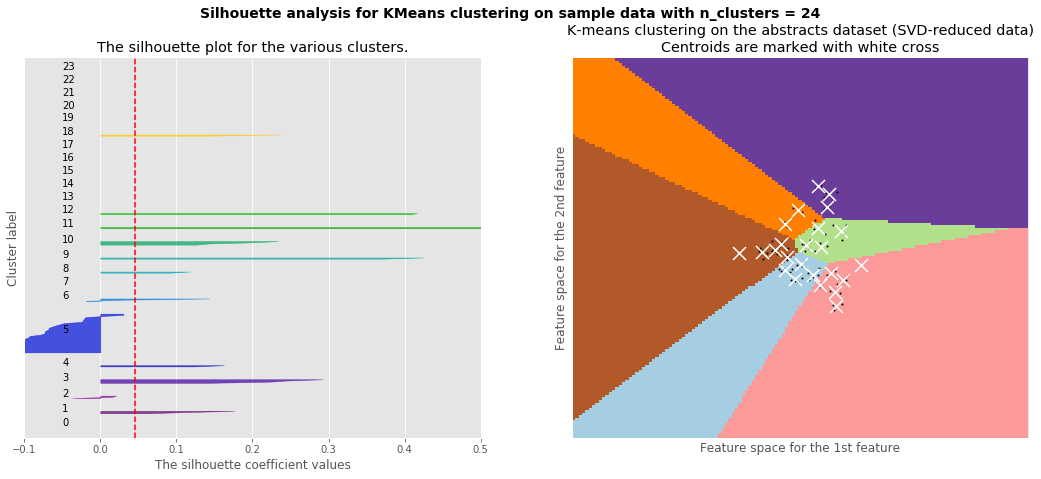

In [92]:
range_n_clusters = range(5, 25)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 0.5]
    ax1.set_xlim([-0.1, 0.5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, data.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)
    
    # PCA using TruncatedSVD for visualization of clusters in 2D space
    svd = TruncatedSVD(n_components=2, n_iter=7, random_state=10)
    reduced_data = svd.fit_transform(data) 
    clusterer_reduced = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    clusterer_reduced.fit(reduced_data)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5])

    # Visualization Code
    #Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.clf()
    ax2.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    ax2.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = clusterer_reduced.cluster_centers_
    ax2.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)


    ax2.set_title('K-means clustering on the abstracts dataset (SVD-reduced data)\n'
              'Centroids are marked with white cross')
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.set_xticks(())
    ax2.set_yticks(())

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Visualization using Dimensionality Reduction (TruncatedSVD)

In [59]:
# #############################################################################
# Visualize the results on PCA-reduced data (PCA doesn't work on sparse input so using TruncatedSVD instead)
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
reduced_data = svd.fit_transform(data) 

print(svd.explained_variance_ratio_)  
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit(reduced_data)

[0.03106891 0.05888852]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

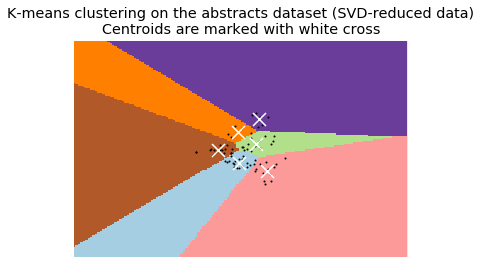

In [61]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the abstracts dataset (SVD-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()